<a href="https://colab.research.google.com/github/DmitrijLeontev/Dmitrij_Leontev/blob/main/DzDatascience/%D0%94%D0%9712_Ultra_Pro%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%2C_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используя базу "Пассажиры автобуса", подготовьте данные для обучения нейронной сети, классифицирующей изображение на два класса:

входящий пассажир

выходящий пассажир

Добейтесь точности работы модели на проверочной выборке не ниже 85%

Ссылка на датасет: https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip

In [ ]:
# Импортируем библиотеки

# Библиотека работы с массивами
import numpy as np

# Последовательная модель НС
from tensorflow.keras.models import Sequential

from keras.utils import load_img

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# Оптимизаторы
from tensorflow.keras.optimizers import Adam

# Разделение на обучающую и проверочную/тестовую выборку
from sklearn.model_selection import train_test_split

# Метод обработки изображений библиотеки Keras
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Метод обработки изображений библиотеки Matplotlib
import matplotlib.image as mpimg

import gdown, os, random

In [ ]:
# Скачаем базу

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l4/bus.zip', None, quiet = True)

'bus.zip'

In [ ]:
# Распакуем датасет в директорию 'content/cars'

!unzip -qo "bus.zip" -d /content/bus

In [ ]:
#Посмотрим на содержимое папки bus:
os.listdir('/content/bus')

['Выходящий', 'Входящий']

Входящий:


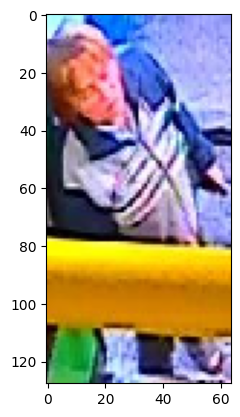

Выходящий:


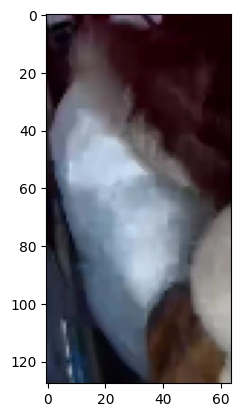

In [ ]:
print('Входящий:')
im_en = random.choice(os.listdir('/content/bus/Входящий'))
tmp = load_img('/content/bus/Входящий/' + im_en, target_size=(128, 64))
plt.imshow(tmp)
plt.show()

print('Выходящий:')
im_en = random.choice(os.listdir('/content/bus/Выходящий'))
tmp = load_img('/content/bus/Выходящий/' + im_en, target_size=(128, 64))
plt.imshow(tmp)
plt.show()

Подготовим на основе этих файлов выборки для обучения модели. Сначала прочитаем каждое изображение и преобразуем его в numpy-массив:

In [ ]:
x_data = []
y_data = []

for f in os.listdir('/content/bus/Входящий'):
  im = np.array(load_img('/content/bus/Входящий/' + f, target_size=(128, 64)))
  x_data.append(im)
  y_data.append(0)

Давайте разберемся, что мы сделали в этом коде.

Создали два пустых списка под изображения и под метки правильных ответов соответственно:

x_data = []
y_data = []

В цикле прошли по всем файлам в папке content/bus/entering:

for f in os.listdir('/content/bus/entering'):

Загрузили изображение, преобразуя его к размеру (128, 64) и формируя из него numpy-массив:

im = np.array(image.load_img('/content/bus/entering/' + f, target_size=(128, 64)))

В список изображений добавили очередной numpy-массив. В список меток добавили 0 (все изображения в папке entering отнесем к нулевому классу):
x_data.append(im)
y_data.append(0)

Аналогичным образом нам нужно обработать папку выходящих пассажиров:

In [ ]:
for f in os.listdir('/content/bus/Выходящий'):
  im = np.array(load_img('/content/bus/Выходящий/' + f, target_size=(128, 64)))
  x_data.append(im)
  y_data.append(1)

Разница лишь в том, что в массив меток мы теперь добавляем не ноль, а единицу (посколько выходящие пассажиры - это первый класс объектов)

Преобразуем списки в numpy-массив:



In [ ]:
x_data = np.array(x_data)
y_data = np.array(y_data)

print(x_data.shape)
print(y_data.shape)

(11677, 128, 64, 3)
(11677,)


По аналогии с базой MNIST воспользуемся методом .reshape() для вытягивания полученных данных в одномерный вектор:

In [ ]:
x_data_reshape = x_data.reshape(-1, 128 * 64 * 3) / 255.
print(x_data_reshape.shape)

(11677, 24576)


In [ ]:
Нам осталось разделить полученные наборы данных на обучающую и тестовую выборки:

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_data_reshape,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=3)

print('Размеры сформированных массивов:')

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

Размеры сформированных массивов:
(9341, 24576)
(2336, 24576)
(9341,)
(2336,)


Выборки подготовлены. Сформируем и обучим нейронную сеть для решения поставленной задачи:

In [ ]:
model = Sequential() # Последовательная модель нейронной сети

model.add(Dense(2048, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(800, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              50333696  
                                                                 
 dense_1 (Dense)             (None, 800)               1639200   
                                                                 
 dense_2 (Dense)             (None, 1)                 801       
                                                                 
Total params: 51,973,697
Trainable params: 51,973,697
Non-trainable params: 0
_________________________________________________________________


Обратите внимание на последний слой модели:

model.add(Dense(1, activation='sigmoid'))

У нас два класса: входящий и выходящий пассажир, но мы используем Dense-слой с одним нейроном.

Текущая задача - пример так называемой бинарной классификации (классификация на два класса). В таких задачах корректнее будет создавать выходной слой с одним нейроном и функцией активации sigmoid (в отличии от задач многоклассовой классификации, где мы используем функцию активации softmax)

Epoch 1/20
73/73 [==============================] - 9s 39ms/step - loss: 0.7502 - accuracy: 0.6531 - val_loss: 0.5507 - val_accuracy: 0.7093
Epoch 2/20
73/73 [==============================] - 2s 24ms/step - loss: 0.5273 - accuracy: 0.7318 - val_loss: 0.4599 - val_accuracy: 0.7851
Epoch 3/20
73/73 [==============================] - 2s 22ms/step - loss: 0.4434 - accuracy: 0.7889 - val_loss: 0.3962 - val_accuracy: 0.8121
Epoch 4/20
73/73 [==============================] - 2s 21ms/step - loss: 0.3841 - accuracy: 0.8169 - val_loss: 0.3681 - val_accuracy: 0.8159
Epoch 5/20
73/73 [==============================] - 2s 22ms/step - loss: 0.3383 - accuracy: 0.8487 - val_loss: 0.3197 - val_accuracy: 0.8566
Epoch 6/20
73/73 [==============================] - 2s 23ms/step - loss: 0.3040 - accuracy: 0.8629 - val_loss: 0.2830 - val_accuracy: 0.8831
Epoch 7/20
73/73 [==============================] - 2s 21ms/step - loss: 0.2891 - accuracy: 0.8693 - val_loss: 0.3173 - val_accuracy: 0.8442
Epoch 8/20
73

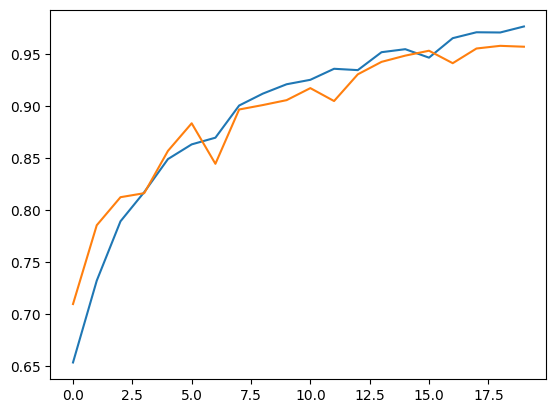

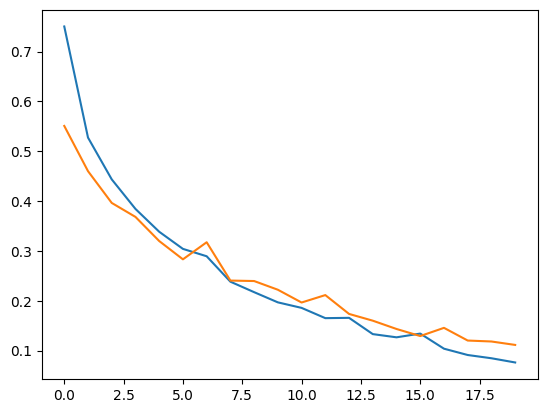

In [ ]:
# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'],
              loss='binary_crossentropy')

# Обучение модели
history = model.fit(x_train,
                    y_train,
                    validation_data=(x_val,
                                     y_val),
                    epochs = 20,
                    batch_size = 128)

# Вывод графика обучения (точность)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# Вывод графика обучения (доля ошибки)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

Задача решена. Мы добились точности распознавания на проверочной выборке 95.68%!

